In [92]:
%matplotlib notebook
import requests
import json, time, datetime, math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

#helper functions
def print_time(unix, msg=''):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(9,9))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    fig.show()

DATA_SOURCE = 'poloniex'
DATA_PATH = 'data/' + DATA_SOURCE + '/'
if DATA_SOURCE == 'poloniex':
    df_btc = pd.read_pickle(DATA_PATH + 'USDT_BTC.pkl')
    df_ltc = pd.read_pickle(DATA_PATH + 'USDT_LTC.pkl')
    df_eth = pd.read_pickle(DATA_PATH + 'USDT_ETH.pkl')
    df_xrp = pd.read_pickle(DATA_PATH + 'USDT_XRP.pkl')
else:
    data_df = pd.read_pickle(DATA_PATH + 'bitcoin.pkl')
    data_df_ltc = pd.read_pickle(DATA_PATH + 'litecoin.pkl')
    data_df_cap = pd.read_pickle(DATA_PATH + 'marketcap-total.pkl')



In [35]:
print("###BITCOIN")
#print(df_btc.describe())
print(df_btc.corr())

print("###LITECOIN")
#print(df_ltc.describe())
print(df_ltc.corr())

print("###ETHEREUM")
#print(df_eth.describe())
print(df_eth.corr())

print("###RIPPLE")
#print(df_xrp.describe())
print(df_xrp.corr())

"""
price_usd = data_df['price_usd'][0::100]
market_cap = data_df['market_cap'][0::100]
volume = data_df['volume_usd'][0::100]

fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(range(len(price_usd)), price_usd, label='Cena USD')
axes.plot(range(len(volume)), volume, label='Volume')
fig.show()
"""
#plt.plot(range(len(price_usd)), price_usd, label='Cena USD')
#plt.plot(range(len(market_cap)), market_cap, label='Market Cap')
#plt.plot(range(len(volume)), volume, label='Volume')
#plt.legend()
#plt.show()

###BITCOIN
                    close      date  quoteVolume    volume  weightedAverage
close            1.000000  0.719543     0.246452  0.556819         0.999994
date             0.719543  1.000000     0.385229  0.418224         0.719551
quoteVolume      0.246452  0.385229     1.000000  0.711372         0.246453
volume           0.556819  0.418224     0.711372  1.000000         0.556828
weightedAverage  0.999994  0.719551     0.246453  0.556828         1.000000
###LITECOIN
                    close      date  quoteVolume    volume  weightedAverage
close            1.000000  0.663105     0.101391  0.365263         0.999991
date             0.663105  1.000000     0.237003  0.291530         0.663083
quoteVolume      0.101391  0.237003     1.000000  0.641120         0.101302
volume           0.365263  0.291530     0.641120  1.000000         0.365070
weightedAverage  0.999991  0.663083     0.101302  0.365070         1.000000
###ETHEREUM
                    close      date  quoteVolume    v

"\nprice_usd = data_df['price_usd'][0::100]\nmarket_cap = data_df['market_cap'][0::100]\nvolume = data_df['volume_usd'][0::100]\n\nfig = plt.figure()\naxes = fig.add_subplot(111)\naxes.plot(range(len(price_usd)), price_usd, label='Cena USD')\naxes.plot(range(len(volume)), volume, label='Volume')\nfig.show()\n"

In [33]:
print(df_btc.describe())
print(70*'#')
print(df_ltc.describe())
print(70*'#')
print(df_eth.describe())
print(70*'#')
print(df_xrp.describe())

               close          date    quoteVolume        volume  \
count  325886.000000  3.258860e+05  325886.000000  3.258860e+05   
mean     2331.271250  1.473256e+09      12.718695  5.938777e+04   
std      3674.291748  2.822260e+07      32.842754  1.798646e+05   
min        99.000000  1.424373e+09       0.000000  0.000000e+00   
25%       369.670591  1.448814e+09       0.000000  0.000000e+00   
50%       642.448000  1.473256e+09       0.371408  2.309700e+02   
75%      2419.966750  1.497697e+09      11.712903  3.989555e+04   
max     19896.687300  1.522138e+09    1244.437950  8.905612e+06   

       weightedAverage  
count    325886.000000  
mean       2331.144496  
std        3674.085054  
min           0.000000  
25%         369.654512  
50%         642.468049  
75%        2419.106768  
max       19888.009976  
######################################################################
               close          date    quoteVolume        volume  \
count  321249.000000  3.212490e+0

<IPython.core.display.Javascript object>


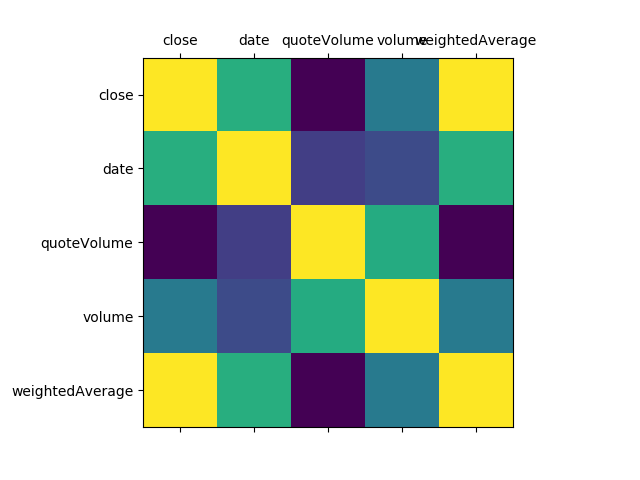

In [27]:
plot_corr(df_btc)

<IPython.core.display.Javascript object>


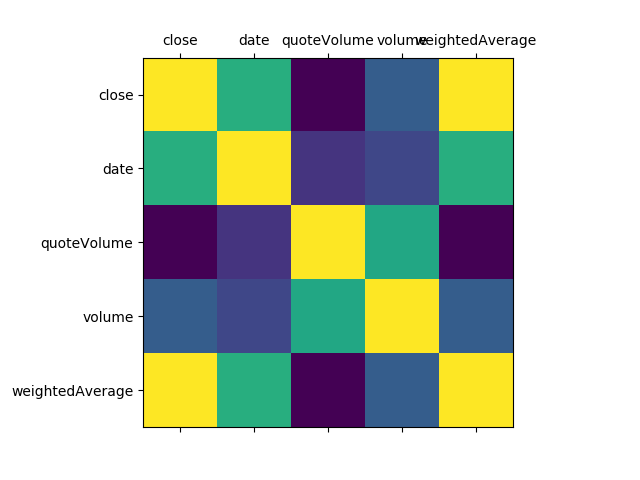

In [28]:
plot_corr(df_ltc)

In [20]:
procent_change_btc = df_btc['close'].pct_change()[1:-1]
procent_change_ltc = df_ltc['close'].pct_change()[1:-1]

btc = df_btc['date'].tolist()[20112]
ltc = df_ltc['date'].tolist()[20112]
print(btc, ltc)

idx = 36528

btc_time = df_btc['date'].tolist()
print_time(btc_time[idx])

#in case we need to 
btc_time = [math.floor((x/300))*300 for x in btc_time]
print_time(btc_time[idx])

1430406600 1431797700
 Fri Jun 26 17:10:00 2015
 Fri Jun 26 17:10:00 2015


In [39]:
idx = -600

btc_time = df_btc['date'].tolist()
ltc_time = df_ltc['date'].tolist()
print_time(btc_time[idx])
print_time(ltc_time[idx])

 Sun Mar 25 08:20:00 2018
 Sun Mar 25 08:20:00 2018


In [94]:
#combine all dataframes into one with size of smallest dataframe - discard every other value
count = [min(df_btc.count(numeric_only=True)), min(df_ltc.count(numeric_only=True)), min(df_eth.count(numeric_only=True)), min(df_xrp.count(numeric_only=True))]
count = min(count)

df_btc = df_btc.add_prefix('btc_')
df_eth = df_eth.add_prefix('eth_')
df_ltc = df_ltc.add_prefix('ltc_')
df_xrp = df_xrp.add_prefix('xrp_')

df_all = pd.concat([df_btc.iloc[-count:].reset_index(drop=True), df_eth.iloc[-count:].reset_index(drop=True), df_ltc.iloc[-count:].reset_index(drop=True), df_xrp.iloc[-count:].reset_index(drop=True)], axis=1)
df_all.count(numeric_only=True)

#cuz date column is same for every currency, we will discard others
df_all.head()
df_all['date'] = df_all['btc_date']
df_all = df_all.drop(columns=['btc_date', 'ltc_date', 'eth_date', 'xrp_date'])
df_all.to_pickle(DATA_PATH + 'combined.pkl')

<IPython.core.display.Javascript object>


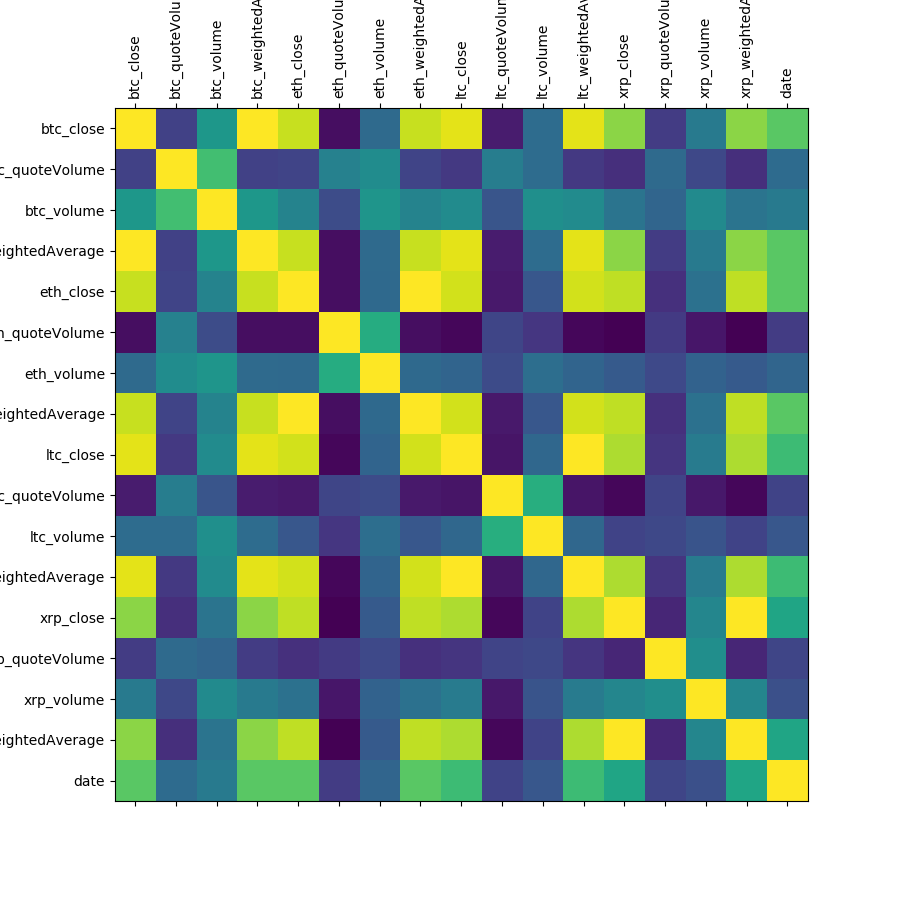

In [95]:
plot_corr(df_all)

In [24]:
plt.boxplot(procent_change_btc)

{'boxes': [<matplotlib.lines.Line2D at 0x1ea020970b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1ea02097c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ea0212df60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ea04d7fd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1ea02097400>,
  <matplotlib.lines.Line2D at 0x1ea02097828>]}

<IPython.core.display.Javascript object>


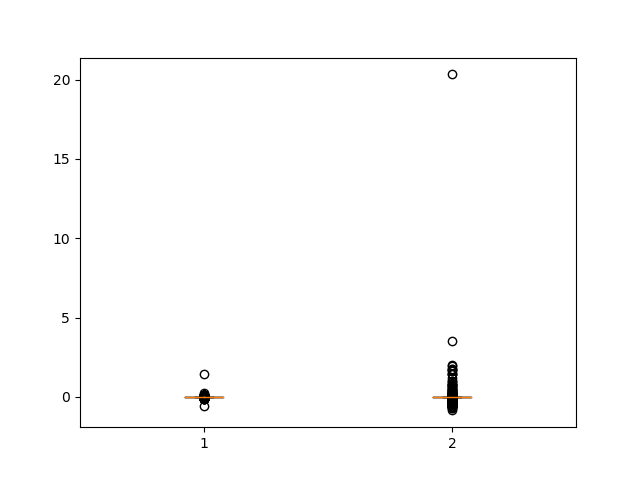

c:\users\deyan\tf-workspace\env\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [29]:
## combine these different collections into a list    
data_to_plot = [procent_change_btc, procent_change_ltc]

# Create a figure instance
fig = plt.figure(1)

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

fig.show()
